## Machine Learning Basic Workflow - 4

### Lets play with Bread Basket Bakery dataset
#### This example would be to play more around pre-processing

The dataset for this problem comes from a bakery in Edinburgh called The Bread Basket (Source: Kaggle). Data set contains over 20,000 items bought over period of six months. The .csv file has the following four fields:

Date. Categorical variable that tells us the date of the transactions in YYYY-MM-DD format.

Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

Transaction. Contains an integer value that denotes the transaction number. The rows that share the same value in this field belong to the same transaction.

Item. Name of the item purchased. For example, 'Bread', 'Cake', 'Coffee', etc.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

*** Load data ***

In [3]:
bakerydf = pd.read_csv("data-files/bb-bakery.csv")
print(bakerydf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [4]:
bakerydf.sample(3)

,Date,Time,Transaction,Item
10378,2017-01-19,14:30:18,4936,Coffee
5761,2016-12-07,09:15:18,2746,Juice
13566,2017-02-11,09:02:01,6366,Pastry


*** Data cleanup - Drop the irrelevant columns ***

In [5]:
# A quick look at dataset, there are handful of items not known marked as NONE

In [6]:
# df = bakerydf[ ~(bakerydf['Item'] == 'NONE') ]
df = bakerydf[bakerydf['Item'] != 'NONE']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


*** We will assess top 10 frequent items ***


In [7]:
items_group = df.groupby('Item').count().sort_values(by='Transaction',ascending=False)
top10_items = items_group.reset_index()['Item'].reset_index().head(10)
top10_items

,index,Item
0,0,Coffee
1,1,Bread
2,2,Tea
3,3,Cake
4,4,Pastry
5,5,Sandwich
6,6,Medialuna
7,7,Hot chocolate
8,8,Cookies
9,9,Brownie


In [8]:
df_10items = df[ df['Item'].isin(top10_items['Item'].tolist()) ]

df_10items.sample(5)

,Date,Time,Transaction,Item
6169,2016-12-10,13:58:17,2945,Tea
4748,2016-11-28,14:09:14,2246,Coffee
12864,2017-02-05,13:03:18,6057,Coffee
15884,2017-02-27,11:05:32,7288,Coffee
20106,2017-04-01,09:07:50,9162,Sandwich


***Data transform - Ordinal/Nominal/Datatype, etc ***

In [9]:
# Items are Nominal values and we will use One Hot Encoding here for analysis

In [10]:
#df_onehot = df_10items.drop(['Date'], axis=1).groupby(['Transaction','Item']).count()

df_onehot = df_10items[['Transaction','Item']]
df_encoded = pd.get_dummies(df_onehot['Item']) #One-hot encoding

df_item = pd.concat([df['Transaction'], df_encoded], axis=1 ) 
df_itemset = df_item.groupby('Transaction').sum().reset_index()

df_itemset.head(3)

,Transaction,Bread,Brownie,Cake,Coffee,Cookies,Hot chocolate,Medialuna,Pastry,Sandwich,Tea
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


*** Lets assess correlation of top 10 items now ***

In [11]:
# for corelatins, lets keep only the items related info
df_itemset = df_itemset.iloc[:,1:]
df_itemset.head(3)

,Bread,Brownie,Cake,Coffee,Cookies,Hot chocolate,Medialuna,Pastry,Sandwich,Tea
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


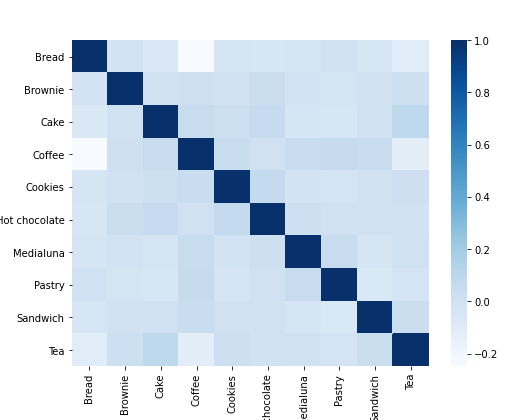

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.heatmap(df_itemset.corr(), cmap=plt.cm.Blues)

<AxesSubplot:>

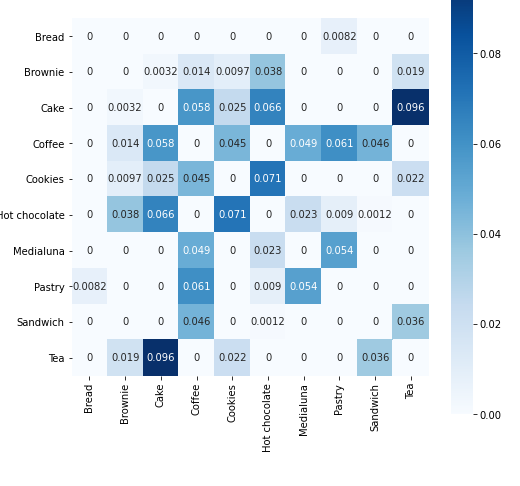

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))

def clip(x):
    # We are effectively removing the negatively correlated pairs and the diagonal elements
    if x<0 or x>=0.9:
        return 0.0
    else:
        return x
    
distinct_pairs = df_itemset.corr().applymap( clip )
    
sns.heatmap( data = distinct_pairs, annot=True,ax=ax,square=True,cmap="Blues")


In [14]:
# Let's make it little more readable and meaningful

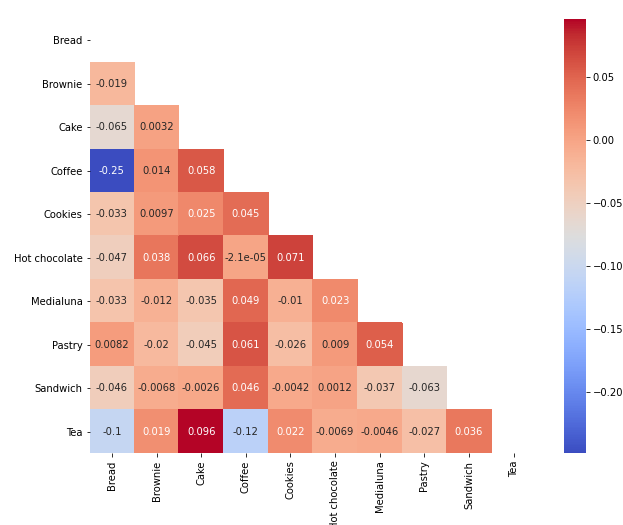

In [15]:
import seaborn as sns

mask = np.zeros_like(df_itemset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_itemset.corr(), 
                 cmap='coolwarm',
                 mask = mask,
                 annot=True)

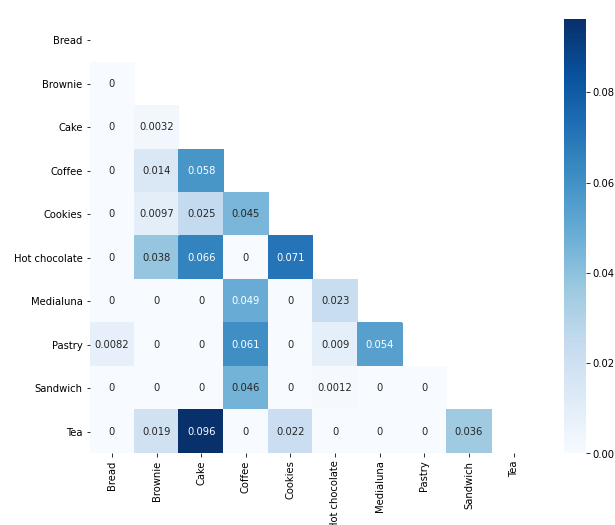

In [19]:
import seaborn as sns


def pick(x):
    # We are effectively removing the negatively correlated pairs 
    # and the diagonal elements
    if x<0 or x>=0.9:
        return 0.0
    else:
        return x


mask = np.zeros_like(df_itemset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_itemset.corr().applymap(pick), 
                 cmap='Blues',
                 mask = mask,
                 annot=True)


In [17]:
# Tea with Cake are most corelated int he item groups!